In [45]:
from IPython.display import Image

### DESCRIPTION:

The **COMPAS** (*Correctional Offender Management Profiling for Alternative Sanctions*) algorithm is a widely used commercial tool that assists judges and parole officers in assessing a criminal defendant’s likelihood of reoffending. However, [academic studies](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm) have revealed that COMPAS exhibits a racial bias favoring white defendants over Black defendants.

A two-year follow-up study, which tracked individuals to see who actually committed crimes or violent crimes post-assessment, demonstrated a troubling pattern of misclassification errors as measured by precision and sensitivity.

## SOCIAL JUSTICE IMPLICATION:

 ### What we are going to do in this notebook:

  - Explore which features are most influential in predicting the COMPAS risk score or recidivism risk. This analysis can reveal if features like race, gender, or socioeconomic status disproportionately impact the risk assessment, potentially leading to biased outcomes

  - Calculate false positives and false negatives for Black and white defendants separately, and assess the disparities in predictive accuracy. This can help you understand the extent of racial bias in the COMPAS algorithm’s predictions.

  - Use this dataset to raise awareness about algorithmic bias and its social implications. Developing case studies or presentations on how biases manifest in predictive tools can help inform policy-makers, researchers, and the public about the importance of fairness in criminal justice technology


 ### Data Science Methods:
  - The purpose of this notebook is to construct different machine learning models to identify and analyze racial bias within the COMPAS dataset. We will use several modeling techniques to predict recidivism and examine whether bias is present in the model's predictions. We will also explore parameter tuning to improve model accuracy and fairness.

     - Data Cleaning and Preparation
     - Define Features and Target Variable
     - Split the Data into Training and Testing Sets
     - Applying Models for Logistic Regression and CART

# COMPAS Recidivism Analysis

## Step 1: Loading the Dataset


**Note**: The original dataset has been preprocessed and filtered to focus on the specific characteristics relevant to the analysis in this notebook. This dataset is a refined version of the original raw data, titled `compas-scores-two-years.csv`.

 To begin, let's load the COMPAS recidivism dataset into our environment. This dataset will allow us to examine the factors that contribute to COMPAS risk scores and investigate potential biases.

   1.**Importing Necessary Libraries:**
      To start, we need to import the essential libraries required for data analysis. These libraries provide the tools necessary for loading, manipulating, and analyzing the dataset.

   2.**Loading the Dataset:**
      Using the pandas library, we can employ the read_csv function to load our dataset into a Pandas DataFrame. This DataFrame will allow us to manipulate and analyze the data efficiently within our notebook environment.

   3.**Inspecting the Dataset:**
      After loading the dataset, it’s crucial to familiarize ourselves with its structure. Understanding the organization and composition of the data will guide our analysis. By using the .info() method, we obtain an overview of the dataset, including column names, data types, and counts of non-null values. This initial exploration helps us identify potential data cleaning needs and provides insights into how we might approach further analysis.

---

### Brief description of each column in the dataset:
  
   -**id**: Unique identifier for each record in the dataset.
   
   -**name**: Full name of the individual being assessed. 
   
   -**first**: First name of the individual.
   
   -**last**: Last name of the individual.
   
   -**compas_screening_date**: The date when the individual was screened using the COMPAS tool.
   
   -**age**: Age of the individual at the time of screening.
   
   -**c_charge_degree**: Degree of the charge faced by the individual (e.g., misdemeanor, felony).
   
   -**race**: Race of the individual.
   
   -**age_cat**: Age category of the individual, likely grouped (e.g., juvenile, adult).
   
   -**score_text**: The risk category assigned to the individual (e.g., low, medium, high risk).
   
   -**sex**: Gender of the individual (male or female).
   
   -**priors_count**: Number of prior offenses committed by the individual.
   
   -**days_b_screening_arrest**: Number of days between screening and arrest.
   
   -**decile_score**: COMPAS risk score on a scale (typically 1-10), predicting the likelihood of reoffending.
   
   -**is_recid**: Indicates whether the individual recidivated (committed another offense) after screening.
   
   -**two_year_recid**: Indicates if the individual recidivated within two years of the screening.
   
   -**c_jail_in**: Date when the individual was admitted to jail.
   
   -**c_jail_out**: Date when the individual was released from jail.
   
   -**length_of_stay**: Length of time (in days) the individual spent in jail for the particular charge.

In [1]:
# Import necessary library
import pandas as pd # pandas is a powerful library for data manipulation and analysis
import numpy as np # numpy is a fundamental package for numerical computing in Python
import os 

In [2]:
# Load the dataset (update the file path as needed)
recidivism_data = pd.read_csv('Data/compas_data.csv')

In [3]:
recidivism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6172 non-null   int64  
 1   name                     6172 non-null   object 
 2   first                    6172 non-null   object 
 3   last                     6172 non-null   object 
 4   compas_screening_date    6172 non-null   object 
 5   age                      6172 non-null   int64  
 6   c_charge_degree          6172 non-null   object 
 7   race                     6172 non-null   object 
 8   age_cat                  6172 non-null   object 
 9   score_text               6172 non-null   object 
 10  sex                      6172 non-null   object 
 11  priors_count             6172 non-null   int64  
 12  days_b_screening_arrest  6172 non-null   float64
 13  decile_score             6172 non-null   int64  
 14  is_recid                

## Challenge: Investigating Columns

- Take a few moments to examine the column names and infer what kind of data might be stored in each. Which columns seem immediately relevant to the analysis of recidivism?

- **Which columns might be critical for assessing the risk of recidivism and why?** 

   - (Consider which variables might impact or correlate with a person’s likelihood of reoffending. For example, do you think demographic information (such as age or ethnicity) or previous criminal history might be important?)

- Are there any columns that seem redundant or irrelevant to our goal of analyzing recidivism risk?

- Based on column names, do you see any that could help us investigate bias, especially related to demographic information like race or gender?

---

## Step 2: Data Cleaning and EDA

Before we dive into analyzing the COMPAS dataset to identify potential bias, it’s crucial to prepare the data. Cleaning and organizing data ensures that it is consistent, relevant, and ready for analysis. In this step, we’ll explain each cleaning task and why it’s important to our analysis.

1. <u>Dropping Irrelevant Columns</u>


   -**Why do we drop certain columns?:**
      - Datasets often contain columns that don’t contribute to the specific goals of our analysis or the model we’re building. These columns might:
   
         - Add unnecessary complexity without providing meaningful insights.
         
         - Contain personal identifiers or sensitive information that are irrelevant to the problem at hand, potentially raising privacy concerns.
          
         - Have no predictive value or relationship to the target variable.

      - By removing these columns, we streamline the dataset, focus on relevant features, and avoid overfitting or noise in the model.
   
   -**Example: Dropping Columns from the COMPAS Dataset**   
   
      - In the COMPAS dataset, we identified columns such as **id, name, first, last, compas_screening_date, c_jail_in, and, c_jail_out**. Here's why these columns are being removed:
      
      
        - They are identifiers: These columns are used to uniquely identify individuals in the dataset, such as their names or ID numbers. They do notprovide any information about the likelihood of reoffending (recidivism). For instance: The name or ID of a person does not influence their risk of reoffending.
        
        - Columns like **compas_screening_date** while useful for record-keeping, it has no predictive relevance to recidivism. 
        
        - Columns like **c_jail_in and c_jail_out** These columns indicate the dates when individuals were admitted to and released from jail.They may provide temporal details but do not directly contribute to understanding the likelihood of reoffending. A better column that we can use as a variable for the model is **length_of_stay** because the duration of time spent in jail could have a direct relationship with recidivism risk, while the individual admission and release dates are less likely to contribute meaningful information.

   -**How Does Dropping These Columns Help?** 
      
      - **Simplifies the Data:** Removing irrelevant columns reduces the dataset's dimensionality, making it easier to focus on meaningful features.
      
      - **Improves Model Performance:** By focusing only on relevant features, we can improve the model's ability to predict recidivism.
      
      - **Protects Privacy:** Excluding personally identifiable information ensures ethical handling of sensitive data.

In [4]:
# This line of code drops columns that are not needed for our analysis
columns_to_drop = ['id', 'name', 'first', 'last', 'compas_screening_date', 'c_jail_in', 'c_jail_out']
recidivism_data = recidivism_data.drop(columns=columns_to_drop, errors='ignore')

In [5]:
# This code shows us the first ten rows of our dataset after dropping the columns we selected 
recidivism_data.head(10)

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,length_of_stay
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,0
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,10
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,1
3,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,1
4,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,6
5,43,F,Other,25 - 45,Low,Male,3,-1.0,4,0,0,0
6,39,M,Caucasian,25 - 45,Low,Female,0,-1.0,1,0,0,2
7,27,F,Caucasian,25 - 45,Low,Male,0,-1.0,4,0,0,1
8,23,M,African-American,Less than 25,Medium,Male,3,0.0,6,1,1,4
9,37,M,Caucasian,25 - 45,Low,Female,0,0.0,1,0,0,0


## Understanding Demographic Distribution: A Key Step in Exploratory Data Analysis (EDA)

Before applying any machine learning model to our dataset, it is crucial to perform Exploratory Data Analysis (EDA) to understand the data’s underlying structure and distribution. One important aspect of EDA is examining the demographic distribution of key variables, such as race, in the dataset. Let’s break this concept down for clarity.

 - **Why Examine Demographic Distribution?**
   - <u>*Understand the Dataset's Composition:*</u>

     - Every dataset tells a story about the population it represents. By looking at the percentage representation of each racial group, we gain insights into how well the dataset reflects the real-world population.
     - For example, in the COMPAS dataset, knowing the proportion of defendants from each racial group helps us identify whether certain groups are overrepresented or underrepresented.
     
   - <u>*Identify Potential Bias:*</u>

     - If one racial group is disproportionately represented in the dataset, it may lead to skewed model outcomes that unfairly favor or penalize certain groups.
     - For instance, if the dataset contains significantly more data on one racial group, the model might "learn" to generalize outcomes based on that group, ignoring nuances for others.
     
   - <u>*Guide Ethical Decision-Making:*</u>

     - Understanding the demographic distribution allows us to evaluate the fairness of our dataset and models.
     - This step aligns with ethical data science practices, ensuring that models do not perpetuate or amplify existing inequalities.
     
  - **How to Perform This Analysis**
      
    - Use descriptive statistics to calculate the percentage of each racial group in the dataset. This step helps quantify representation. Use the code provided below to calculate 
     

In [6]:
# Calculating the percentage of each race category

# Total number of rows
total_rows = len(recidivism_data)
print("Black defendants: {:.2f}%".format((3175 / total_rows) * 100))
print("White defendants: {:.2f}%".format((2103 / total_rows) * 100))
print("Hispanic defendants: {:.2f}%".format((509 / total_rows) * 100))
print("Asian defendants: {:.2f}%".format((31 / total_rows) * 100))
print("Native American defendants: {:.2f}%".format((11 / total_rows) * 100))

Black defendants: 51.44%
White defendants: 34.07%
Hispanic defendants: 8.25%
Asian defendants: 0.50%
Native American defendants: 0.18%


#### a. Calculating the Percentage of Each Race Category

- **What Are We Doing?**

    - We’re calculating the percentage representation of each racial group in the dataset to understand its demographic distribution.

- **Why Is This Important?**

    - Knowing the racial breakdown helps us evaluate whether the dataset is balanced or skewed toward certain groups.

    - Disproportionate representation of specific racial groups may impact the fairness of any models we build, as the model might overfit to the majority group and underperform for minority groups.

    - It also provides a baseline for assessing disparities in the model’s outcomes later.

- **Results:**

    - Black defendants: 51.44% (Majority)
    
    - White defendants: 34.07%
    
    - Hispanic defendants: 8.25%
    
    - Asian defendants: 0.50%
    
    - Native American defendants: 0.18%

- **How Should I Interpret This?**

   - The dataset is dominated by Black (51.44%) and White (34.07%) defendants, with significantly lower representation for other racial groups.

   - Such imbalances could mean that the model might perform better for Black and White defendants due to the higher data availability, but it might struggle with smaller groups like Native American and Asian defendants due to insufficient training data.

In [7]:
# Summary of 'sex' column
sex_summary = recidivism_data['sex'].value_counts().sort_index()
print("\nSex Breakdown:")
print(sex_summary)

# Calculating the percentage of each sex category
print("Men: {:.2f}%".format((4997 / total_rows) * 100))
print("Women: {:.2f}%".format((1175 / total_rows) * 100))


Sex Breakdown:
Female    1175
Male      4997
Name: sex, dtype: int64
Men: 80.96%
Women: 19.04%


#### b. Summary of the sex Column

- **What Are We Doing?**

    - We’re analyzing the distribution of the sex variable to understand the gender composition of the dataset.

- **Why Is This Important?**

    - Understanding the gender breakdown helps identify if certain groups are underrepresented, which may impact the analysis and model performance.

    - It also allows us to check for potential biases in risk assessments based on gender.

- **Results:**

    - Male: 80.96%
    
    - Female: 19.04%

- **How Should I Interpret This?**

   - The dataset has a significant imbalance in gender representation, with male defendants making up the vast majority (80.96%).

   - Understand that this imbalance could result in the model being more accurate for males and less reliable for females, as the model might prioritize patterns found in the majority group.

In [8]:
# Cross-tabulation of 'sex' and 'race'
sex_race_ct = pd.crosstab(recidivism_data['sex'], recidivism_data['race'])
print("\nSex by Race Breakdown:")
print(sex_race_ct)


Sex by Race Breakdown:
race    African-American  Asian  Caucasian  Hispanic  Native American  Other
sex                                                                         
Female               549      2        482        82                2     58
Male                2626     29       1621       427                9    285


#### c. Cross-Tabulation of sex and race

- **What Are We Doing?**

    - We’re using `pd.crosstab()` to create a table that shows the counts of male and female defendants across different racial groups.

- **Why Is This Important?**

    - Cross-tabulating variables provides a deeper understanding of how categories interact
    
    - This step allows us to see whether gender representation differs across racial groups, highlighting additional imbalances.
    
- **Key Observations:**

    - <u>Imbalance Across Groups:</u>
    
        - Among African-American defendants, males vastly outnumber females (2626 vs. 549)
        - This pattern holds across other racial groups, with males consistently being the majority.

    - <u>Small Group Sizes:</u>
    
        - Certain groups, such as Native American and Asian defendants, have very low representation overall, regardless of gender.

- **How Should I Interpret This?**

    - These results highlight intersectional imbalances, where certain combinations (e.g., Asian females, Native American females) are particularly underrepresented.
    
    - This matters because underrepresented groups may have less reliable predictions or outcomes in a model.
    
    - Fairness considerations in data science involve not just single variables (e.g., race or gender) but also how these variables interact


-----
#### Based on this small analyis on just two column of our dataset. Here are some questions for you to start thinking aboout:

1. Based on the racial distribution, which racial group has the highest representation among defendants, and what might this overrepresentation suggest in terms of systemic issues?

2. Given the disproportionate racial distribution, how might the biases in this data affect the accuracy and fairness of predictive models like COMPAS?

3. What strategies could be implemented to reduce potential biases in datasets like this one, particularly for use in predictive algorithms?

-----

# Exploring Racial Disparities in COMPAS Decile Scores: A Step-by-Step Approach for Data Visualization and Analysis

Visualizing data is an essential part of Exploratory Data Analysis (EDA). It helps us uncover patterns, relationships, and potential disparities within our dataset. In this section, we will analyze the distribution of decile scores for defendants of different racial groups in the COMPAS dataset, focusing on African-American and Caucasian defendants. This analysis will provide insights into possible racial disparities in risk assessments.

## Step 1: Import Libraries for Visualization

 - To begin, we need to load Python libraries that simplify data visualization:

   - **Matplotlib:** A foundational plotting library that allows detailed customization of plots.
   
   - **Seaborn:** Built on top of Matplotlib, it simplifies creating visually appealing and informative statistical graphics.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Filter the Data for Specific Racial Groups

 - **Why Filter Data?** Focusing on specific groups (e.g., African-American and Caucasian defendants) allows us to:

   - Compare distributions and highlight disparities.
   - Identify potential differences in the assignment of decile scores across racial groups.


In [10]:
# Implementation: Create two subsets of the data for African-American and Caucasian defendants:
# Filter data for African-American and Caucasian defendants
df_black = recidivism_data[recidivism_data['race'] == 'African-American']
df_white = recidivism_data[recidivism_data['race'] == 'Caucasian']

## Step 3: Visualize the Decile Score Distribution

 - Visualization helps us compare decile score distributions side by side for both racial groups. Follow these steps:

   - <u>Set Up the Plotting Environment:</u>

        - Use `plt.subplots()` to create a figure with two subplots for side-by-side comparison.

        - Use `sharey=True` to ensure the y-axis is consistent across both plots.
        
   - <u>Create Bar Plots:</u>

        - Use Seaborn’s `sns.countplot()` to plot the count of each decile score.

        - Sort the decile scores for easier interpretation.

    - <u>Enhance Readability:</u>

       - Label the axes using `set_xlabel()` and `set_ylabel()`.

       - Add meaningful titles to each plot using `set_title()`.

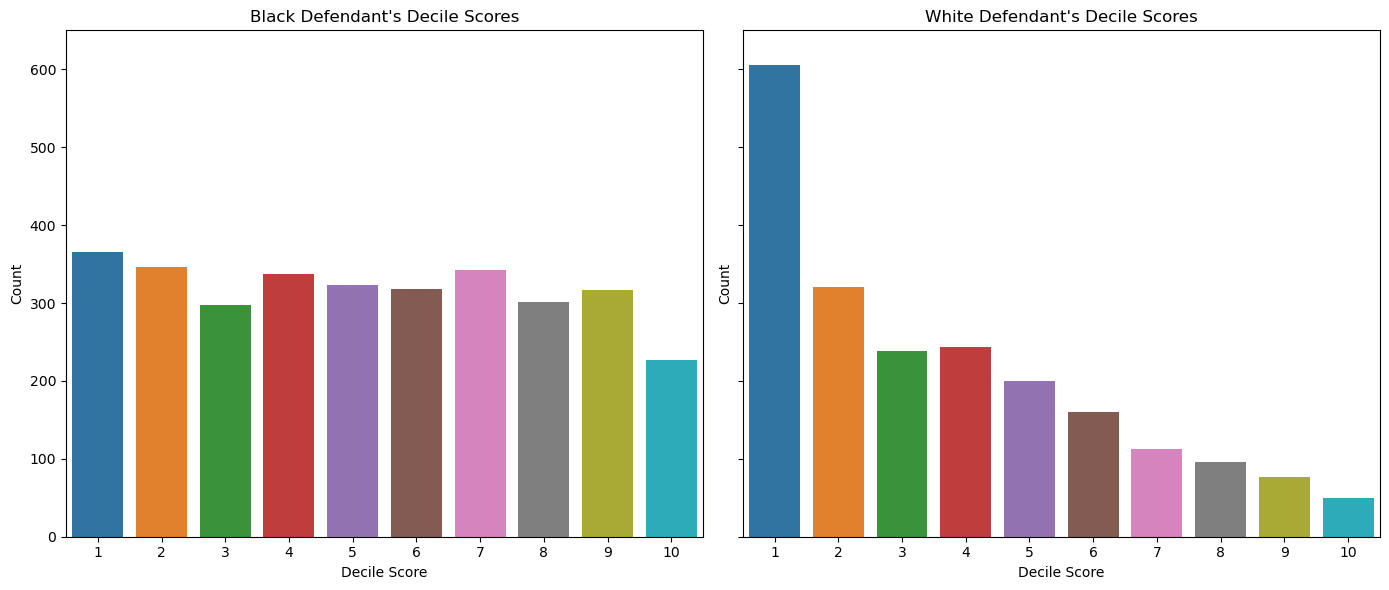

In [11]:
# Set up the figure for side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for African-American defendants
sns.countplot(data=df_black, x='decile_score', order=sorted(df_black['decile_score'].unique()), ax=axes[0])
axes[0].set_title("Black Defendant's Decile Scores")
axes[0].set_xlabel("Decile Score")
axes[0].set_ylabel("Count")
axes[0].set_ylim(0, 650)

# Plot for Caucasian defendants
sns.countplot(data=df_white, x='decile_score', order=sorted(df_white['decile_score'].unique()), ax=axes[1])
axes[1].set_title("White Defendant's Decile Scores")
axes[1].set_xlabel("Decile Score")
axes[1].set_ylabel("Count")
axes[1].set_ylim(0, 650)

plt.tight_layout()
plt.show()

##### **The bar plots show the frequency distribution of decile scores (ranging from 1 to 10) for Black defendants (left plot) and White defendants (right plot). Decile scores are used in the COMPAS system to predict the likelihood of recidivism, with higher scores indicating higher risk.**

- <u>Observations from the Plots</u>

    - For Black Defendants:

         - The decile scores are relatively evenly distributed, with similar counts across all score levels.

         - This suggests that Black defendants are assigned risk scores across the entire spectrum (1 to 10) without a clear downward or upward trend.

    - For White Defendants:

         - There is a strong downward trend, with the majority of White defendants receiving lower decile scores (e.g., score = 1).

        - Higher decile scores (e.g., 9 and 10) are far less frequent for White defendants compared to Black defendants.

- <u>How Should I Interpret This?</u>
    
     - Disparity in Risk Assessments: The even distribution for Black defendants and the skewed distribution for White defendants indicate potential racial disparities in how decile scores are assigned.

     - Implications: These disparities could affect judicial outcomes, as individuals with higher scores might face harsher decisions (e.g., stricter bail or parole conditions).

## Step 4: Cross-Tabulation for Deeper Analysis

  - What is Cross-Tabulation?
  
       - Cross-tabulation creates a contingency table that shows the frequency of occurrences for combinations of categories in two variables. It’s particularly useful for:

         - Comparing categorical data distributions.
         - Identifying patterns, trends, or disparities across groups.
         - Summarizing data in an easily interpretable format.

   - For example:

     - Rows can represent one categorical variable (e.g., decile scores: 1-10).
     - Columns can represent another categorical variable (e.g., racial groups: African-American, Caucasian, etc.).
     - The intersection of each row and column gives the count of records that fall into that combination.
     
   - Why Use `pd.crosstab()`?
       - In this step, we use `pd.crosstab()` to compare decile scores (assigned by the COMPAS system) across different racial groups. The `pandas.crosstab()` function is ideal for creating cross-tabulations in Python because it:

       - Simplifies the Process:

          - It automatically groups data into unique categories for both variables.
          - It computes the counts for all combinations of categories.

       - Customizable:

          - You can adjust the row or column labels and add additional information like row or column percentages.

       - Efficient:

          - It’s optimized for large datasets, making it a go-to tool for summarizing categorical data.


In [12]:
# Generate a cross-tabulation of decile scores by race
decile_race_ct = pd.crosstab(recidivism_data['decile_score'], recidivism_data['race'])
print("Decile Score by Race Cross-tabulation:")
print(decile_race_ct)

Decile Score by Race Cross-tabulation:
race          African-American  Asian  Caucasian  Hispanic  Native American  \
decile_score                                                                  
1                          365     15        605       159                0   
2                          346      4        321        89                2   
3                          298      5        238        73                1   
4                          337      0        243        47                0   
5                          323      1        200        39                0   
6                          318      2        160        27                2   
7                          343      1        113        28                2   
8                          301      2         96        14                0   
9                          317      0         77        17                2   
10                         227      1         50        16                2   

race        

##### Key Observations from the Table:

- **High Decile Scores (9 and 10):**

    - African-American defendants: 317 (score = 9), 227 (score = 10).
    - Caucasian defendants: 77 (score = 9), 50 (score = 10).
    - Black defendants are significantly overrepresented in the highest risk categories compared to White defendants.

- **Low Decile Scores (1 and 2):**

   - African-American defendants: 365 (score = 1), 346 (score = 2).
   - Caucasian defendants: 605 (score = 1), 321 (score = 2).
   - A disproportionately high number of White defendants are assigned the lowest risk scores compared to Black defendants.

- **Other Groups:**

    - Groups like Asian, Hispanic, and Native American defendants have very low representation, making it difficult to draw conclusions about their risk score distributions.
    - This lack of representation highlights the need for caution when interpreting results for these groups, as insufficient data can lead to unreliable outcomes.
    
- **How Should I Interpret This?**

    - Quantifying the Disparity: The table complements the bar plots by providing precise numbers for each racial group and decile score, making it clear that Black defendants are overrepresented in higher decile scores, while White defendants dominate lower scores.
    - Recognize that these patterns raise fairness concerns, as the data suggests systematic differences in how risk scores are assigned based on race (Fairness Concers).

---
# LOGISTIC REGRESION

- **Why Use It?**

    - Logistic regression is a statistical method used for binary classification tasks. In this case, the goal is to predict whether an individual will re-offend (recidivist = 1) or not (non-recidivist = 0).

- **Why is it suitable here?**

    - The target variable has two possible outcomes (binary).
    
    - Logistic regression estimates the probability of an individual belonging to a particular class (e.g., recidivist) based on input features (e.g., sex, race, prior offenses).
    
- **Steps for Predicting Recidivism using Logistic Regression:**

    - Baseline Evaluation: Establishing a baseline accuracy (e.g., how well predictions perform with simple assumptions, such as always predicting the majority class).
    
    - Data Preparation: Preparing the dataset by selecting features and splitting it into training and test sets.
    
    - Logistic Regression Models: Training the logistic regression model on the prepared data.
    
    - Model Evaluation: Evaluating the model's performance using metrics like accuracy, confusion matrix, and classification report.

---
## Import Libraries:

1. `train_test_split` (from sklearn.model_selection):

    - Splits the dataset into training and test sets to ensure that the model is trained and evaluated on separate data.

    - **Why?** It prevents overfitting and ensures the model generalizes well to unseen data.
    
2. `confusion_matrix`, `accuracy_score`, `classification_report` (from sklearn.metrics):

    - **Metrics to evaluate the model:**
        - Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.
        
        - Accuracy Score: Measures the percentage of correct predictions.
        
        - Classification Report: Provides precision, recall, F1-score, and support for each class.

3. `variance_inflation_factor` (from statsmodels.stats.outliers_influence):

    - Measures multicollinearity (correlation among independent variables).
    
    - **Why?** High multicollinearity can distort the model’s predictions and coefficients, so it's essential to check and address it.

4. `smf` (from statsmodels.formula.api):

    - Allows the use of formulas to define logistic regression models in a statistical framework.

    - **Why?** It provides a more detailed statistical summary, including coefficients, p-values, and confidence intervals.

In [7]:
# Importing Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

---
## Feature Selection:

The dataset (recidivism_data) includes many columns, but only a subset is selected for the analysis:

   - **sex:** Gender of the individual.
   - **race:** Racial group of the individual.
   - **age_cat:** Age category (e.g., "Greater than 45", "25-45", "Less than 25").
   - **c_charge_degree:** The degree of the criminal charge (e.g., felony, misdemeanor).
   - **priors_count:** Number of prior offenses.
   - **two_year_recid:** Target variable indicating whether the individual re-offended within two years.
   - **score_text:** COMPAS risk score category (e.g., Low, Medium, High).

**Why?** These features are most relevant for predicting recidivism.

- Inspecting the Data:

`.head()`: Displays the first few rows of the new dataset to confirm the selection.

- Why is Data Preparation Important?

    - It ensures the model uses only meaningful variables.
    - Irrelevant features are excluded to improve model performance and interpretability.


In [8]:
recidivism_data_2 = recidivism_data[['sex', 'race', 'age_cat', 'c_charge_degree', 'priors_count', 'two_year_recid', 'score_text']]
recidivism_data_2.head()

,sex,race,age_cat,c_charge_degree,priors_count,two_year_recid,score_text
0,Male,Other,Greater than 45,F,0,0,Low
1,Male,African-American,25 - 45,F,0,1,Low
2,Male,African-American,Less than 25,F,4,1,Low
3,Male,Other,25 - 45,M,0,0,Low
4,Male,Caucasian,25 - 45,F,14,1,Medium


---
## One-Hot Encoding and Its Importance

When preparing data for a model, specifically categorical variables (like race, sex, age_cat, etc) must be converted into a numerical format that the model can understand. In this examples, we are using one-hot encoding to tansform our categorical columns into a binary format. This ensures that our model can properly interpret our variables. 

- **Why One-Hot Encoding?**
   - One-hot encoding is a method of representing categorical data as binary variables. For each unique category in a column, a new column is created, and rows are assigned a 1 if they belong to that category or a 0 otherwise. 
   - **Avoiding Bias Interpretation:** If categorical data is encoded as numeric values (e.g., 0, 1, 2, 3), the model might mistakenly interpret these as ordered (e.g., 3 > 2 > 1 > 0), which would introduce bias. One-hot encoding prevents this by treating each category as independent.
   
- **Breaking the Race Column into Separate Values:**   
    - The race column includes multiple categories, such as African-American, Caucasian, Hispanic, etc. By one-hot encoding this column, we create new binary columns for each category:

        - race_African_American
        - race_Asian
        - race_Caucasian
        - race_Hispanic
        - race_Native_American

    - Each row will have a 1 in the column corresponding to the individual's race and 0 in all others.

- **Why Do This?**

    - Allowing the Model to Account for Race:
    
       - By creating separate columns for each race, the model can analyze the influence of being in a particular racial group on the outcome (e.g., recidivism risk). This is essential for investigating disparities or potential biases.

    - Ensuring Flexibility:
    
       - Treating each race category independently allows the model to assign unique coefficients to each race group during training, enabling it to learn group-specific patterns.

- **Other Preprocessing Steps:**

    - Encoding Other Categorical Variables:

        - Similar to the race column, other categorical variables like sex and age_cat are also one-hot encoded. This ensures that the model treats all categorical variables consistently.

    - Dropping Irrelevant or Redundant Columns:

        - After one-hot encoding, redundant columns like race_Other or the original categorical columns (e.g., race, score_text) are dropped. This simplifies the dataset and prevents multicollinearity (correlation between variables).

    - Transforming Specific Variables:

        - Variables like score_text and c_charge_degree are mapped to binary values for simplicity: E.g., score_text is converted into a score_factor column, where "High" = 1 and other scores = 0.


In [9]:
# One-hot encode categorical columns
recidivism_data_2 = pd.get_dummies(recidivism_data_2, columns=['race'], drop_first=False)
recidivism_data_2 = pd.get_dummies(recidivism_data_2, columns=['sex'], drop_first=True)
recidivism_data_2 = pd.get_dummies(recidivism_data_2, columns=['age_cat'], drop_first=True)

# Create binary factors for 'score_text' and 'c_charge_degree'
recidivism_data_2['score_factor'] = recidivism_data_2['score_text'].apply(lambda x: 1 if x == 'High' else 0)
recidivism_data_2['crime_factor'] = recidivism_data_2['c_charge_degree'].apply(lambda x: 1 if x == 'M' else 0)

# Drop unnecessary columns
columns_to_drop = ['c_charge_degree', 'score_text', 'race_Other']
recidivism_data_2 = recidivism_data_2.drop(columns=columns_to_drop)

# Standardize column names by replacing spaces and hyphens with underscores
recidivism_data_2.columns = recidivism_data_2.columns.str.replace(' ', '_').str.replace('-', '_', regex=False)

In [10]:
recidivism_data_2.head(10)

,priors_count,two_year_recid,race_African_American,race_Asian,race_Caucasian,race_Hispanic,race_Native_American,sex_Male,age_cat_Greater_than_45,age_cat_Less_than_25,score_factor,crime_factor
0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0
2,4,1,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,1
4,14,1,0,0,1,0,0,1,0,0,0,0
5,3,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,1,0,0,0,0
8,3,1,1,0,0,0,0,1,0,1,0,1
9,0,0,0,0,1,0,0,0,0,0,0,1


---
## Train-Test Split

The code snippet divides the dataset into training and testing subsets using the train_test_split function from scikit-learn. This is a crucial step in preparing data for the models. Let’s break it down.

- **Why Do We Split the Data?**

    - To Evaluate Model Performance on Unseen Data:

       - If we train and test a model on the same data, it will perform well because it has already "seen" the data during training. This leads to **overfitting**, where the model memorizes the training data but performs poorly on new, unseen data.
       
       - Splitting ensures that the model is evaluated on data it has not seen during training, giving us a realistic measure of its generalization ability.

    - Training vs. Testing:

       - **Training Set**: Used to teach the model how to identify patterns and relationships in the data.
       
       - **Testing Set**: Used to simulate how the model would perform in real-world scenarios where new, unseen data is encountered.


- **Why Choose 70/30 for Train-Test Split?**

  - 70% Training Data:
  
       - Provides enough data for the model to learn meaningful patterns and relationships.

  - 30% Testing Data:
  
       - Reserves a sufficient portion of the data to evaluate the model's performance.
       - Ensures that the test set is large enough to provide statistically significant results.

**Note: The split ratio can vary (e.g., 80/20 or 60/40), but 70/30 is a common choice for most datasets.**

- **Why Use random_state?**

    - Reproducibility:
       - Without random_state, the data split will change every time the code is run because the splitting process is random by default.
       - It ensures that the random process produces the same results every time the code is run. This makes the output reproducible and consistent.


In [21]:
recidivsm_train, recidivsm_test = train_test_split(recidivism_data_2, test_size=0.3, random_state=88)
recidivsm_train.shape, recidivsm_test.shape

((4320, 12), (1852, 12))

---
## Building the Logistic Regression Model

- **Breaking Down the Model:**
    - **smf.logit:** This function builds a logistic regression model where the output (dependent variable) is binary (1 for "High Risk," 0 for "Not High Risk").

- **Formula Syntax:**

   - Left Side (score_factor): The dependent(Target) variable we are predicting.
   - Right Side: The independent variables (features) used to make predictions:

        - **priors_count:** The number of prior offenses.
        - **two_year_recid**: Whether the individual reoffended within two years.
        - **sex_Male:** Gender indicator (1 = Male, 0 = Female).
        - **Race Indicators (race_African_American, race_Asian, etc.):** One-hot encoded columns for different racial groups.
        - **age_cat_Greater_than_45 and age_cat_Less_than_25:** Age categories, one-hot encoded.
        - **crime_factor:** A binary factor derived from the severity of the charge.
        - **data=recidivsm_train:** Indicates that the model is trained on the recidivsm_train dataset.
        - **.fit():** Fits the logistic regression model by finding the optimal coefficients for each feature.

- **Why Build the Model This Way?**

    - Predicting score_factor:
    
        - The goal is to predict whether an individual is classified as "High Risk" (1).

    - Including Key Features:
    
        - The predictors chosen represent known factors that influence recidivism risk, such as prior offenses, race, and age.

    - Accounting for Bias:
    
        - By including one-hot encoded race variables, the model can reveal how different racial groups impact the likelihood of being classified as "High Risk." This helps analyze whether racial bias exists in the classification process.

    - Logistic Regression:
    
        - Logistic regression is suitable for binary classification problems where the target variable has only two possible outcomes.


In [23]:
logreg = smf.logit(formula= 'score_factor ~ priors_count + two_year_recid + sex_Male + race_African_American + race_Asian + race_Caucasian + race_Hispanic + race_Native_American + age_cat_Greater_than_45 + age_cat_Less_than_25 + crime_factor', 
          data=recidivsm_train).fit()

Optimization terminated successfully.
         Current function value: 0.358268
         Iterations 7


In [24]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:           score_factor   No. Observations:                 4320
Model:                          Logit   Df Residuals:                     4308
Method:                           MLE   Df Model:                           11
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.2458
Time:                        05:59:37   Log-Likelihood:                -1547.7
converged:                       True   LL-Null:                       -2052.1
Covariance Type:            nonrobust   LLR p-value:                2.479e-209
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.6866      0.313    -11.792      0.000      -4.299      -3.074
priors_count                0.1897      0.011     17.918      0.000       0.169       0.210


## Explanation of the Logistic Regression Summary

he output from logreg.summary() provides detailed insights into the logistic regression model's performance and the influence of each variable. Below, we break down each section of the summary and explain its significance.

- **Coefficients Table:**
    - This is the most important part for interpreting the model. Here's what each column means:

   - coef (Coefficient):
   
        - Indicates the effect of each variable on the log-odds of the target (score_factor being 1).
        - Positive values increase the likelihood of being classified as "High Risk"; negative values decrease it.

    - std err:

        - The standard error of the coefficient estimate. Smaller values indicate more precise estimates.
        
    - z:
    
        - The z-score for the hypothesis test of whether the coefficient is significantly different from 0.

    - P>|z|:
    
        - The p-value for the hypothesis test. A value less than 0.05 suggests that the variable is statistically significant. 

    - [0.025, 0.975]:
    
        - The 95% confidence interval for the coefficient estimate. If the interval does not include 0, the variable is likely significant.


- **Key Variables and Their Interpretation:**

    - Intercept (-3.6866):
        - Represents the log-odds of being classified as "High Risk" when all predictors are at their baseline (e.g., priors_count = 0, etc.).

    - priors_count (0.1897):
        - Statistically significant (p < 0.05), indicating that prior offenses increase the likelihood of being classified as "High Risk."

    - two_year_recid (0.8348):
        - Statistically significant. Individuals who recidivate within two years are much more likely to be classified as "High Risk."

    - sex_Male (0.0234):
        - Not statistically significant (p = 0.853), indicating gender (male) does not have a meaningful impact on the prediction.

    - race_African_American (1.1341):
        - Statistically significant. African American individuals are more likely to be classified as "High Risk."

    - race_Asian (0.9437):
        - Not statistically significant (p = 0.257).

    - race_Caucasian (0.5713):
        - Marginally significant (p = 0.052).

    - race_Native_American (2.3407):
        - Statistically significant. Native American individuals have a very high likelihood of being classified as "High Risk."

    - age_cat_Greater_than_45 (-1.5726):
        - Statistically significant. Being over 45 reduces the likelihood of being classified as "High Risk."

    - age_cat_Less_than_25 (1.1201):
        - Statistically significant. Individuals under 25 are more likely to be classified as "High Risk."

    - crime_factor (-0.3344):
        - Statistically significant. A lower crime severity decreases the likelihood of being classified as "High Risk."
        
- **What the Model Tells Us**

    - Significance of Variables:

       - Variables like priors_count, two_year_recid, and specific race categories (e.g., African American and Native American) significantly impact predictions.

       - Some variables (e.g., sex_Male) are not significant, suggesting they do not meaningfully affect the classification.

    - Racial Bias:

       - The coefficients for race categories like race_African_American and race_Native_American are large and statistically significant, which may indicate potential bias in the model or underlying data.

    - Age Effects:

       - Younger individuals (age_cat_Less_than_25) are more likely to be classified as "High Risk," while older individuals (age_cat_Greater_than_45) are less likely.

    - Model Performance:

       - The pseudo R-squared of 0.2458 suggests the model explains some variability in the target, but there is room for improvement.

       - Significant predictors demonstrate that the model is capturing meaningful relationships.        
--- 

## What is VIF (Variance Inflation Factor)?

Variance Inflation Factor (VIF) measures the degree of multicollinearity in a dataset. Multicollinearity occurs when two or more independent variables are highly correlated, leading to redundancy in the model. This can make it difficult for the regression model to determine the individual effect of each variable on the dependent variable.

The VIF score for each feature quantifies how much the variance of a regression coefficient is inflated due to collinearity with other features.

- **How to Interpret VIF values:**
   - VIF = 1:
        - No multicollinearity.
   - VIF between 1 and 5:
        - Moderate multicollinearity (acceptable for most cases).
   - VIF > 5:
        - High multicollinearity; the feature may need to be removed or transformed.
        
- **Why Is VIF Important After Building the Model?**

    - Identifying Redundancies:

       - If multiple features have high VIFs, they are likely redundant. For example, if race_African_American and another race category have high VIFs, one could be removed without losing significant information.

    - Improving Model Interpretability:

       - By addressing high VIFs (e.g., removing or combining correlated variables), we can better understand the individual contribution of each feature.

    - Enhancing Model Stability:

        - Lowering multicollinearity ensures the coefficients are stable and reliable across different datasets or when new data is introduced.  


In [25]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = recidivsm_train.columns
vif_data["VIF"] = [variance_inflation_factor(recidivsm_train.values, i) for i in range(recidivsm_train.shape[1])]
print(vif_data)

                    Feature       VIF
0              priors_count  2.081948
1            two_year_recid  2.129255
2     race_African_American  3.744606
3                race_Asian  1.034161
4            race_Caucasian  2.558706
5             race_Hispanic  1.436694
6      race_Native_American  1.011229
7                  sex_Male  4.460961
8   age_cat_Greater_than_45  1.407042
9      age_cat_Less_than_25  1.491566
10             score_factor  1.579993
11             crime_factor  1.567824


## Results Interpretation

Here’s a summary of what the results indicate:

   - priors_count (2.08) and two_year_recid (2.13):

        - These features have low VIF values, suggesting minimal multicollinearity.

   - race_African_American (3.74) and race_Caucasian (2.56):

        - Moderate VIF values indicate some correlation with other variables, but it's not severe.

   - sex_Male (4.46):

       - While the VIF is slightly higher, it’s still within acceptable limits.

   - Other Variables (VIF < 2):

       - Minimal multicollinearity, indicating these variables are largely independent.

**Key Insight:**
> The dataset shows low to moderate multicollinearity across most features, meaning the regression model is not significantly affected by redundant information.
---

## Predictions

- **What This Does?**

    - This line uses the trained logistic regression model (logreg) to predict the probabilities of the target variable (score_factor) for the test dataset (recidivsm_test).

- **Why Probabilities?**

    - Logistic regression outputs probabilities for each observation, representing the likelihood of the target variable being 1 (high risk). These probabilities are continuous values between 0 and 1.

- **Example Output:**

    - If a record has a predicted probability of 0.8, it means the model predicts an 80% chance that the individual is high risk.
    - Conversely, if the probability is 0.3, it indicates a 30% chance of being high risk.

- **Why is This Useful?**

    - Probabilities provide more nuanced information about the model's confidence in its predictions. However, we often need binary decisions (e.g., high risk or not), which brings us to the next step.
    
- **Why Converting Probabilities to Binary Predictions?**
    - Binary predictions are essential for evaluating model performance. It ensures the model outputs align with the problem context: deciding whether someone is high risk or not. If the probability is greater than 0.5 (50%), predict 1 (high risk). Otherwise, predict 0 (low/medium risk).



In [27]:
# Step 5: Model Predictions
y_prob = logreg.predict(recidivsm_test)
y_pred = pd.Series([1 if x > 1/2 else 0 for x in y_prob], index=y_prob.index)

---
## Confusion Matrix

#### Why is This Important?

- **Fairness Analysis**
    - Consistency Across Groups:

        - In predictive models, fairness means ensuring that the model performs equally well for all groups, regardless of demographic factors like race, gender, or age.
        - By calculating confusion matrices for specific racial groups, we can assess how the model treats these groups differently.
        - Example:
            - If the False Positive Rate (FPR) (predicting "High Risk" when the actual risk is "Low/Medium") is higher for African-American defendants than for Caucasian defendants, it indicates the model unfairly flags African-Americans as "High Risk."
            - Similarly, if the False Negative Rate (FNR) (predicting "Low/Medium Risk" when the actual risk is "High") is higher for Caucasian defendants, it suggests the model underestimates the risk for Caucasians.

    - Incorrect Classifications:

       - Fairness analysis allows us to measure whether the model disproportionately misclassifies individuals from certain groups.
       - Example:
           - If African-Americans are more likely to be incorrectly classified as "High Risk," this could lead to unjust treatment, such as harsher penalties or denial of bail.
           - If Caucasians are more likely to be incorrectly classified as "Low/Medium Risk," this might result in underestimating the risk posed by individuals in this group.

- **Bias Detection**
    - Identifying Systemic Bias:

        - Confusion matrices can expose systemic biases in the dataset or the model. For example:
        
            - If the training data contains historical biases (e.g., law enforcement practices disproportionately targeting African-Americans), the model might perpetuate these biases.
            - A higher False Positive Rate (FPR) for African-Americans could reflect such biases in the dataset.


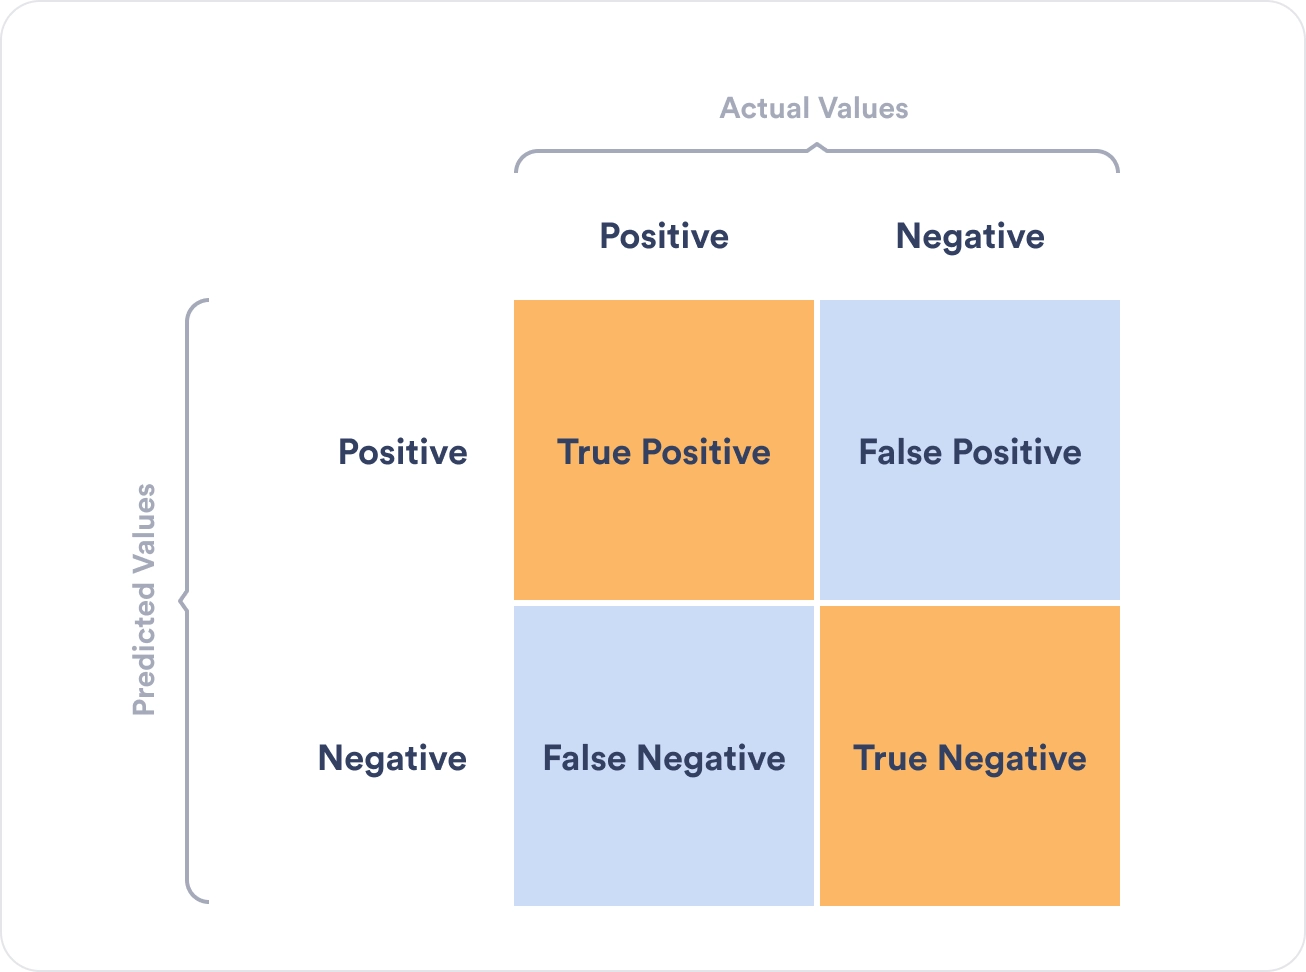

In [43]:
Image(filename='Images/confusionmatrix.png')

### **Note:** The model we created predicts the score_factor (which is binary: 1 for "High" and 0 for "Low" or "Medium"). It does not directly predict race. However, you can evaluate how well the model performs for each specific race group by filtering the dataset by race and then checking the model's predictions within those subsets.

In [30]:
# Filter the test dataset for each race
african_american_test = recidivsm_test[recidivsm_test['race_African_American'] == 1]
caucasian_test = recidivsm_test[recidivsm_test['race_Caucasian'] == 1]

In [31]:
# Predict probabilities for each race
african_american_prob = logreg.predict(african_american_test)
caucasian_prob = logreg.predict(caucasian_test)

In [32]:
# Convert probabilities to binary predictions
african_american_pred = (african_american_prob > 0.5).astype(int)
caucasian_pred = (caucasian_prob > 0.5).astype(int)

In [33]:

# Get actual values for each race
african_american_true = african_american_test['score_factor']
caucasian_true = caucasian_test['score_factor']


# Confusion matrices
african_american_cm = confusion_matrix(african_american_true, african_american_pred)
caucasian_cm = confusion_matrix(caucasian_true, caucasian_pred)


# Print confusion matrices
print("Confusion Matrix for African-American:")
print(african_american_cm)

print("Confusion Matrix for Caucasian:")
print(caucasian_cm)



Confusion Matrix for African-American:
[[650  38]
 [172  90]]
Confusion Matrix for Caucasian:
[[574   6]
 [ 66   7]]


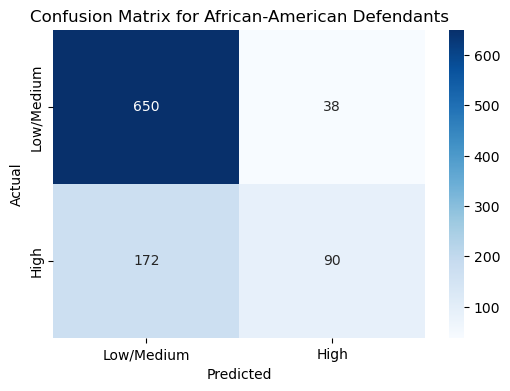

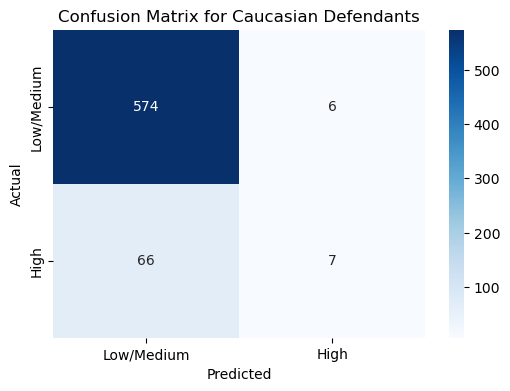

In [34]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low/Medium', 'High'], yticklabels=['Low/Medium', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for African-American
plot_confusion_matrix(african_american_cm, "Confusion Matrix for African-American Defendants")

# Plot for Caucasian
plot_confusion_matrix(caucasian_cm, "Confusion Matrix for Caucasian Defendants")

---
# CART model


- **Why Use It?**

    - CART is a tree-based machine learning model used for both classification and regression tasks. The decision-making process is visualized as a tree, making it interpretable and easy to explain, which is critical in social justice applications. For classification, it divides the data into subgroups to predict class labels (e.g., recidivist = 1, non-recidivist = 0).

- **Why is it suitable here?**

    - The dataset contains both numerical and categorical features, which CART handles effectively **without needing extensive preprocessing.** 
    
    - CART is less prone to overfitting if its depth is controlled (e.g., max_depth=5), as done in the implementation.
    
- **Steps for Predicting Recidivism using Logistic Regression:**

    - Baseline Evaluation: Set up a decision tree with constraints like max_depth to prevent overfitting.
    
    - Data Preparation: Preparing the dataset by selecting features and splitting it into training and test sets.
    
    - CART Model Training: Use the DecisionTreeClassifier to create a decision tree, with constraints to improve generalization (e.g., limiting depth and setting a random state).
    
    - Model Evaluation: Analyze the confusion matrix to understand where the model performs well and where it struggles

---
## Import Libraries:

1. `DecisionTreeClassifier` (from sklearn.tree):

    - A Decision Tree Classifier predicts a target variable (like recidivism = 0 or 1) by learning simple decision rules inferred from the data.

    - **Why?** This is the main function that helps us create a Decision Tree Classifier, which is the machine learning model used in this task.
    
**Note: Some of the libraries we previously used for Logistic Regression will also be utilized in building our CART model. This reuse highlights the versatility of these tools, as they are fundamental for various machine learning tasks.**

In [11]:
# Builds the prediction model.
from sklearn.tree import DecisionTreeClassifier

## STEPS:

- <u>Step 1</u>: Define Features (X) and Target (y)

- <u>Step 2</u>: Split Data into Training and Testing Sets

**Note: The first two steps here are the same as those we followed for Logistic Regression. However, a key advantage of the CART model is that it does not require us to encode categorical variables (e.g., converting them into numeric format). CART can seamlessly handle both numerical and categorical data simultaneously within the same model, making it more versatile and easier to use in scenarios with mixed data types.**

- <u>Step 3</u>: Create and Train the CART Model

  - **What’s Happening in this setp?**

    - We use `DecisionTreeClassifier(max_depth=5, random_state=42)`:
  
         - max_depth=5: Limits the tree to 5 levels, preventing overfitting and keeping the model interpretable.
         - Random_state=42: Ensures consistency in how the tree is built.
         
       - fit(X_train2, y_train2): The model learns patterns from the training data by creating decision rules.
        
    - **Why are we doing This?**

        - This step builds the actual Decision Tree. The model now "understands" how features like prior arrests, race, or other variables affect the likelihood of reoffending.
    

In [32]:
X = recidivism_data_2.drop(columns = ['score_factor'])
y = recidivism_data_2['score_factor']

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
cart_model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
cart_model2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=5, random_state=42)

---
## What  should we do next?

 - Let's import `plot_tree()`. **Why These Imports?** This function from sklearn.tree visualizes the structure of the Decision Tree. It shows how the tree makes decisions by splitting the data based on feature values.

    - Ploting: 
        - `plt.figure(figsize=(30, 20))`: Adjsuting the plot. The plot size is increased to ensure all nodes and labels are clearly visible.
        - `plot_tree(...)`: Visualizing the Decision Tree. 
            - <u>The tree visualization</u>:
                - `feature_names`: Displays the names of the features (e.g., priors_count, age_cat).
                - `class_names`: Assigns meaningful labels (No Recidivism, Recidivism) instead of numbers (0 or 1).
                - `filled=True`: Colors the nodes to represent the predicted class for better clarity.
                - `fontsize=12`: Ensures the text is legible, especially in a complex tree.
        - `plt.show()`: Displaying the Tree.

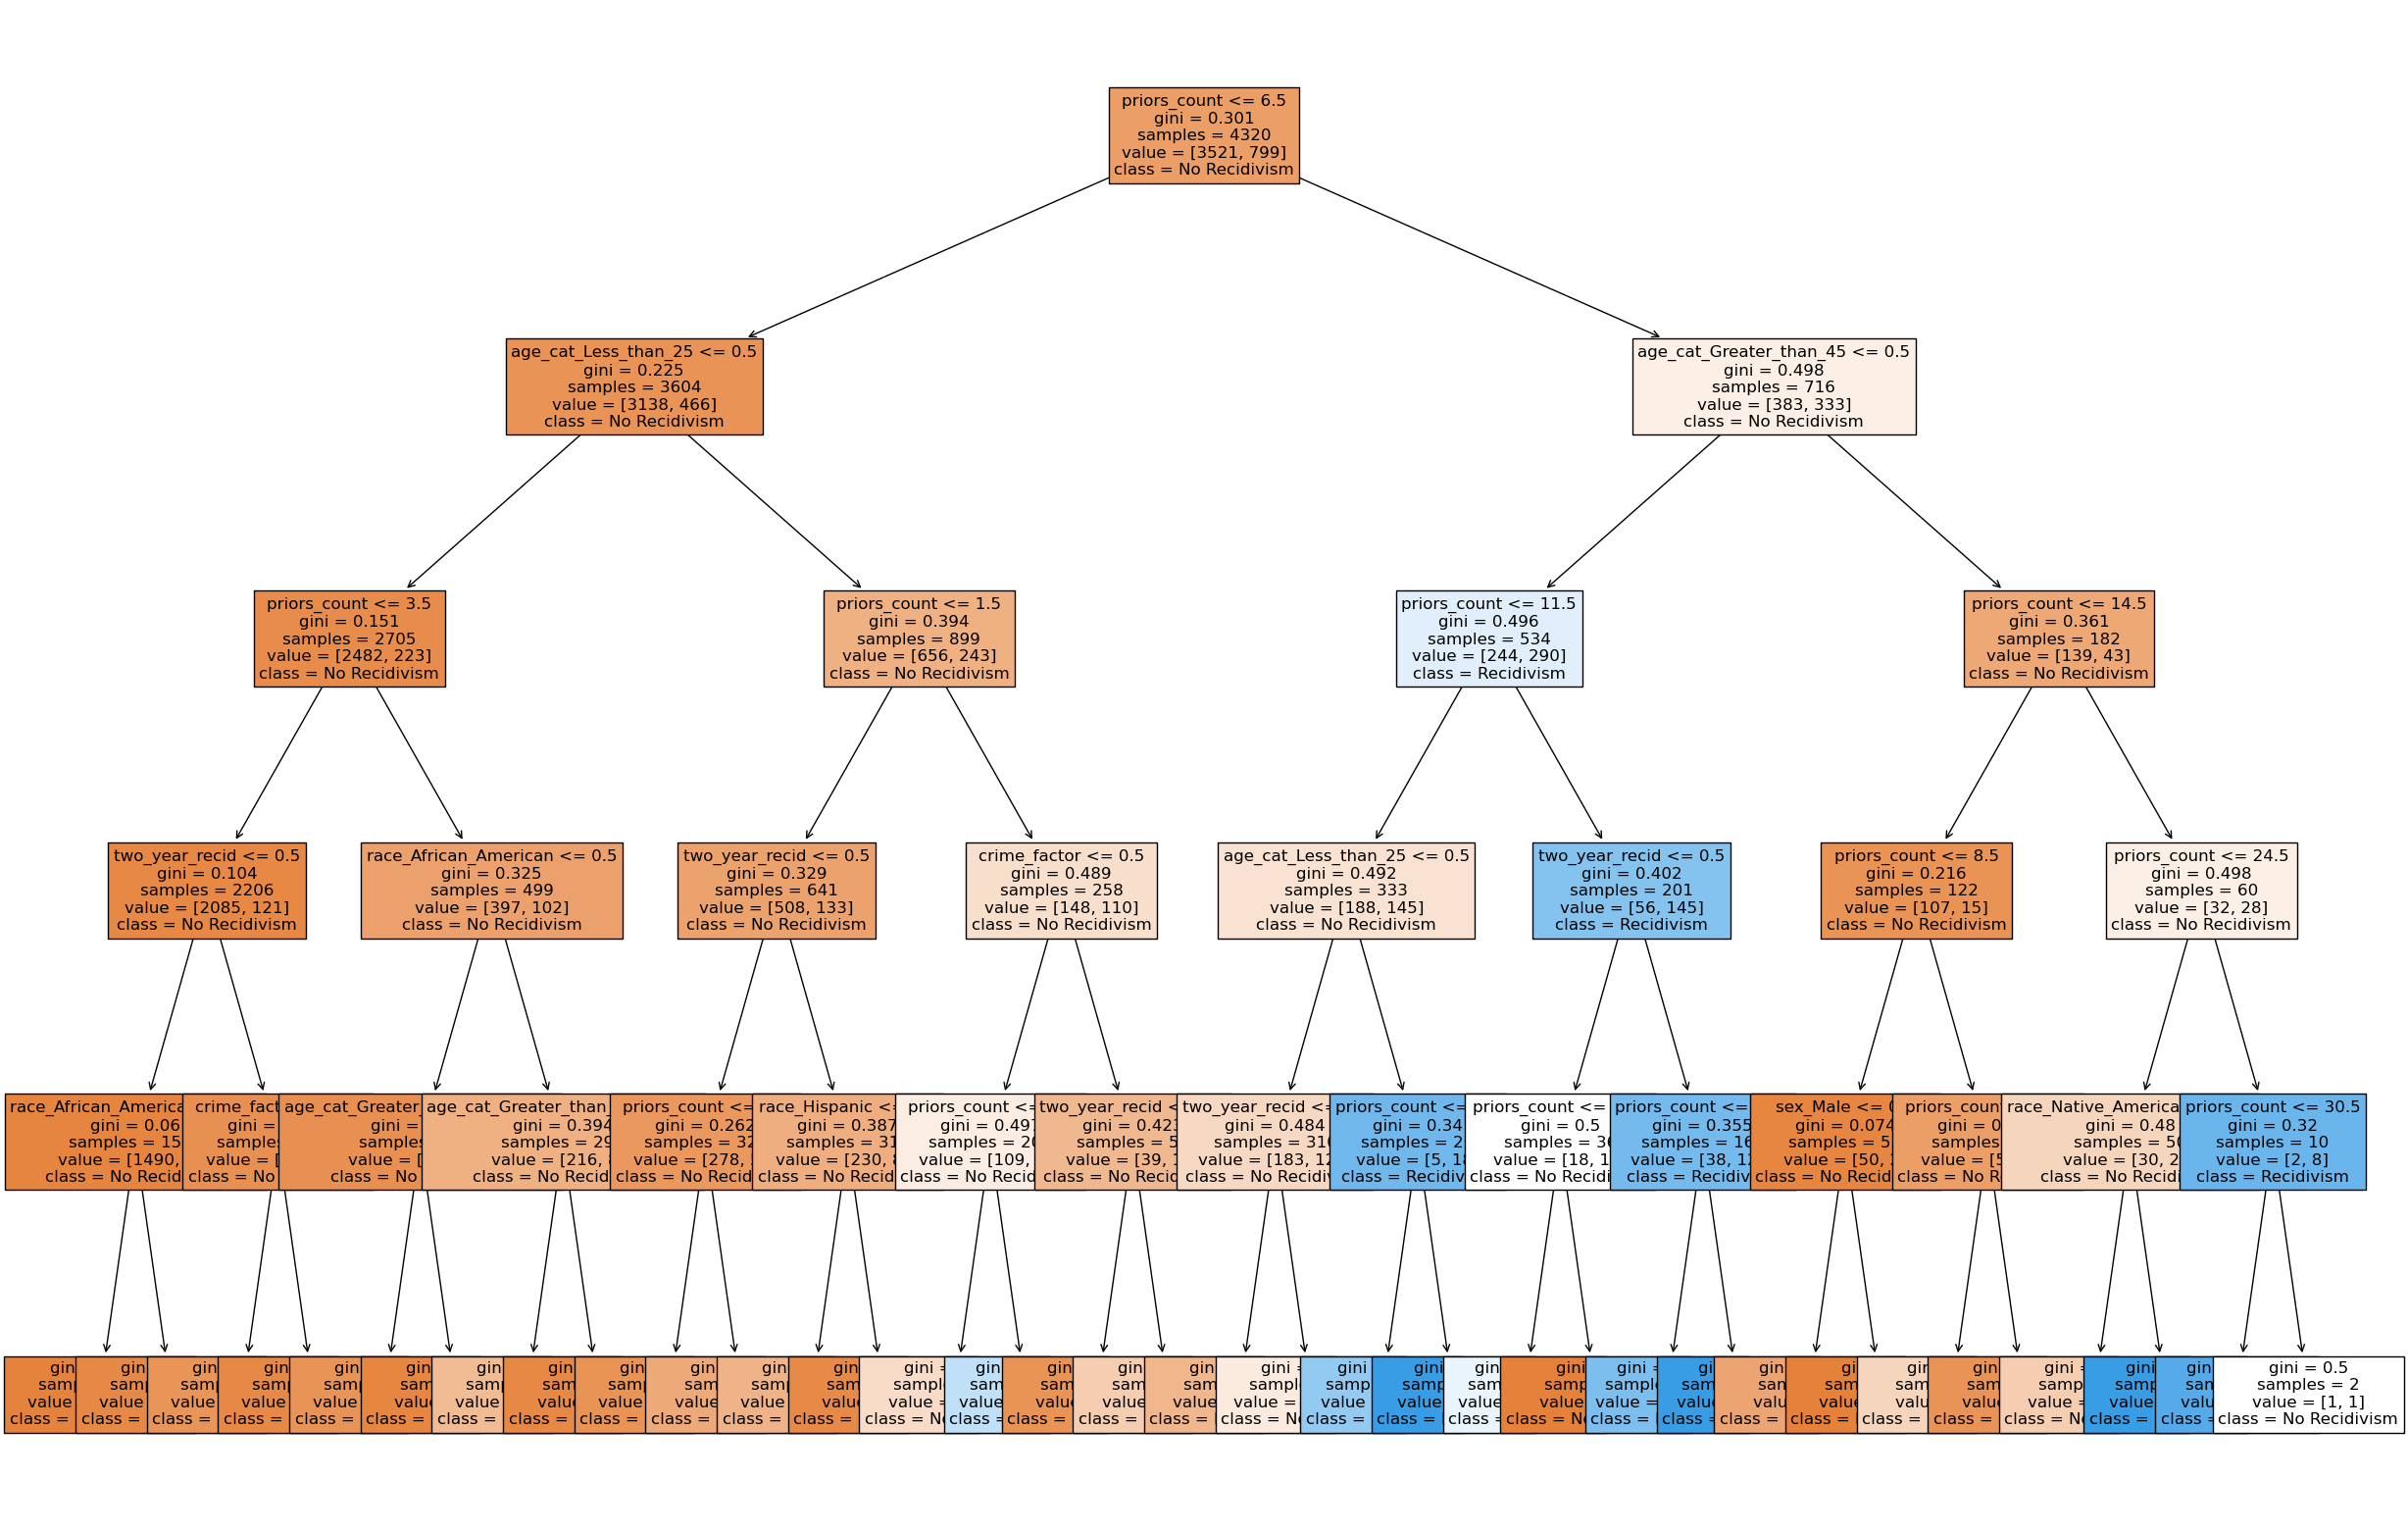

In [40]:
from sklearn.tree import plot_tree

# Adjust the figure size and font size for better visibility
plt.figure(figsize=(30, 20))  # Increase the figure size
plot_tree(cart_model2, 
          feature_names=feature_names2, 
          class_names=['No Recidivism', 'Recidivism'], 
          filled=True, 
          fontsize=12)  # Increase the font size
plt.show()

## How to interprate our tree plot? 

#### Feature Importance:

   - priors_count (Number of prior arrests) is the most important feature, as it appears in the root node and influences the first split. This suggests that the model heavily relies on this feature when predicting recidivism.

   - age_cat (Age categories) and race-related variables also influence splits further down the tree.

#### Color-Coded Nodes:

   - Orange nodes predict "No Recidivism."
  
   - Blue nodes predict "Recidivism."
 
   - The intensity of the color reflects the confidence of the prediction (stronger colors indicate purer classifications).

#### Class Distribution:

   - The "samples" count in each node shows how the data is distributed across splits, which helps us understand how much weight the model gives to certain features.

<u>Main Points</u>: 

- **The Tree Structure:** Think of the decision tree as a flowchart that asks "yes" or "no" questions to classify individuals based on features.

- **Interpretable Machine Learning:** Decision Trees are easy to visualize and understand, making them a great starting point for understanding models.

- **Bias Awareness:** Always critically examine which features the model relies on, as this can reveal potential biases.
---

## Feature Importance:

#### What’s Happening Here?:

   - We want to extract feature importances:
        - What Are Feature Importances?

           - In decision trees, feature importance measures how much each feature contributes to reducing uncertainty (impurity) in the tree's predictions.
           - Features that the tree splits on more frequently and earlier (closer to the root) are considered more important.
        - Why Extract Them?

           - To understand which features the CART model relies on the most when making predictions.
           - This allows us to detect potential bias by identifying if sensitive features (e.g., race or gender) are influencing the model disproportionately.

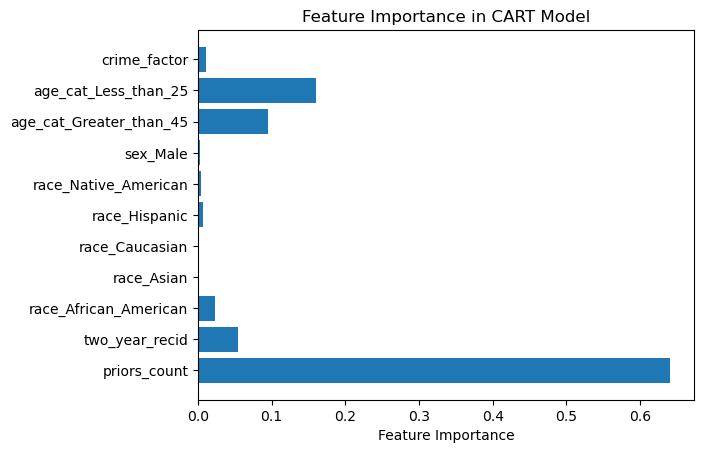

In [41]:
# Feature importances
importances2 = cart_model2.feature_importances_
feature_names2 = X_train2.columns

# Plot feature importances
plt.barh(feature_names2, importances2)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CART Model')
plt.show()

## Why Are We Doing This?

   - Understanding Model Decisions:

        - This visualization helps us see which features are driving the model’s predictions.
         - For example, priors_count has the largest bar, meaning the model relies on this feature the most to predict recidivism.

   - Detecting Bias:

        - If sensitive features (like race or gender) have high importance, it suggests the model is disproportionately relying on them, which could lead to biased predictions.
        - In this case:
             - Features like **race_African_American**, **race_Hispanic**, and **sex_Male** have very low importance, but their inclusion in the model raises ethical concerns.
             - The heavy reliance on **priors_count** could still reflect bias if prior arrests disproportionately affect certain racial or socioeconomic groups due to systemic issues.
---             

## Adding Predictions and Actuals to the Dataset

#### Why Do This?
   - By adding predictions and actual outcomes to the dataset, we can analyze how well the model performed across different groups, such as by race.
   - This is essential for identifying disparities in the model’s predictions for different demographic groups.
    
   - How to do this?: 
      - The predicted values (y_pred2) and actual labels (y_test2) are added as new columns ('predictions' and 'actual') to the testing dataset (X_test2).
      - `reset_index(drop=True)` ensures that the indices of y_test2 match those of X_test2, so the data aligns properly.

In [42]:
# Add predictions to the dataset
X_test2['predictions'] = y_pred2
X_test2['actual'] = y_test2.reset_index(drop=True)

# Group by race and compare metrics
race_analysis2 = X_test2.groupby('race_African_American')[['predictions', 'actual']].mean()
print(race_analysis2)

                       predictions    actual
race_African_American                       
0                         0.024526  0.174216
1                         0.109948  0.184932


In [43]:
# Add predictions to the dataset
X_test2['predictions'] = y_pred2
X_test2['actual'] = y_test2.reset_index(drop=True)

# Group by race and compare metrics
race_analysis2 = X_test2.groupby('race_Caucasian')[['predictions', 'actual']].mean()
print(race_analysis2)

                predictions    actual
race_Caucasian                       
0                  0.091954  0.177083
1                  0.023659  0.184615


In [44]:
# Add predictions to the dataset
X_test2['predictions'] = y_pred2
X_test2['actual'] = y_test2.reset_index(drop=True)

# Group by race and compare metrics
race_analysis2 = X_test2.groupby('race_Hispanic')[['predictions', 'actual']].mean()
print(race_analysis2)

               predictions    actual
race_Hispanic                       
0                 0.073486  0.183365
1                 0.013245  0.140000


## What Are We Looking For?

- Comparison of Predictions vs. Actuals:

  - If the predicted recidivism rates (from the model) consistently differ from the actual rates for certain racial groups, this could indicate bias.
   - For example:
     - If the model predicts higher recidivism rates for African Americans compared to their actual rates, this might reflect unfair bias.
     
- Disparities Across Groups:

  - Check if the model’s performance metrics (predictions and actuals) are significantly different for one racial group compared to others.
  - Large disparities would suggest the model is not treating all groups fairly.

---
  
### Results:

**African American Group (race_African_American):**

  - Predictions:

     - 0 (Not African American): 0.0245 (average predicted recidivism rate).
     - 1 (African American): 0.1099 (average predicted recidivism rate).

  - Actuals:

    - 0 (Not African American): 0.1742 (actual recidivism rate).
    - 1 (African American): 0.1849 (actual recidivism rate).

 - Observation:

    - The model underpredicts recidivism rates for both groups but predicts a much higher rate for African Americans than for non-African Americans.

**Caucasian Group (race_Caucasian):**

   - Predictions:

        - 0 (Not Caucasian): 0.0919.
        - 1 (Caucasian): 0.0236.

   - Actuals:

     - 0 (Not Caucasian): 0.1770.
     - 1 (Caucasian): 0.1846.

   - Observation:

     - The model predicts much lower recidivism rates for Caucasians compared to their actual rates.
     - For non-Caucasians, predictions are also underestimating actual recidivism.
    
**Hispanic Group (race_Hispanic):**

  - Predictions:

    - 0 (Not Hispanic): 0.0734.
    - 1 (Hispanic): 0.0132.

  - Actuals:

    - 0 (Not Hispanic): 0.1836.
    - 1 (Hispanic): 0.1400.

  - Observation:

    - The model underpredicts recidivism for Hispanics and non-Hispanics, but the gap is particularly large for Hispanics.
    
**Summary:Doing this analyzis help us evaluate how the model performs for different racial groups, highlighting any disparities in predictions vs. actual outcomes. By comparing predictions and actuals, we can detect potential bias in the model and address fairness issues.**

In [35]:
y_pred2 = cart_model2.predict(X_test2)
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1507
           1       0.74      0.27      0.40       345

    accuracy                           0.85      1852
   macro avg       0.80      0.63      0.66      1852
weighted avg       0.83      0.85      0.82      1852

[[1461   35]
 [ 279   77]]
